# Support Vector Machine

In [5]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
import seaborn as sns

from mpl_toolkits import mplot3d

from sklearn.model_selection import train_test_split
from sklearn.datasets._samples_generator import make_blobs
from sklearn.datasets._samples_generator import make_circles
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

plt.style.use("ggplot")

## Working with Perfectly Linear Dataset

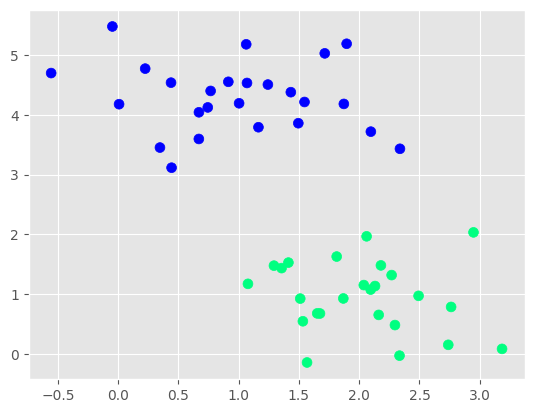

In [5]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="winter")
plt.show()

In [7]:
model = SVC(kernel="linear", C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support = True):
    """
    Plot the decision function for a 2D SVC
    """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors="k", levels=[-1, 0, 1], alpha=0.5,
              linestyles=["--", "-", "--"])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],
                  s=300, linewidth=1, facecolor="none")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

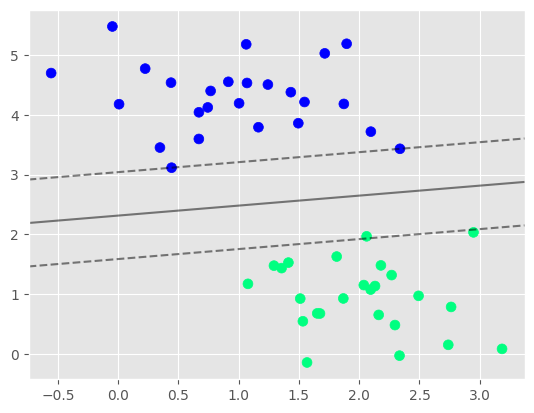

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="winter")
plot_svc_decision_function(model);

### The importance of Support Vectors

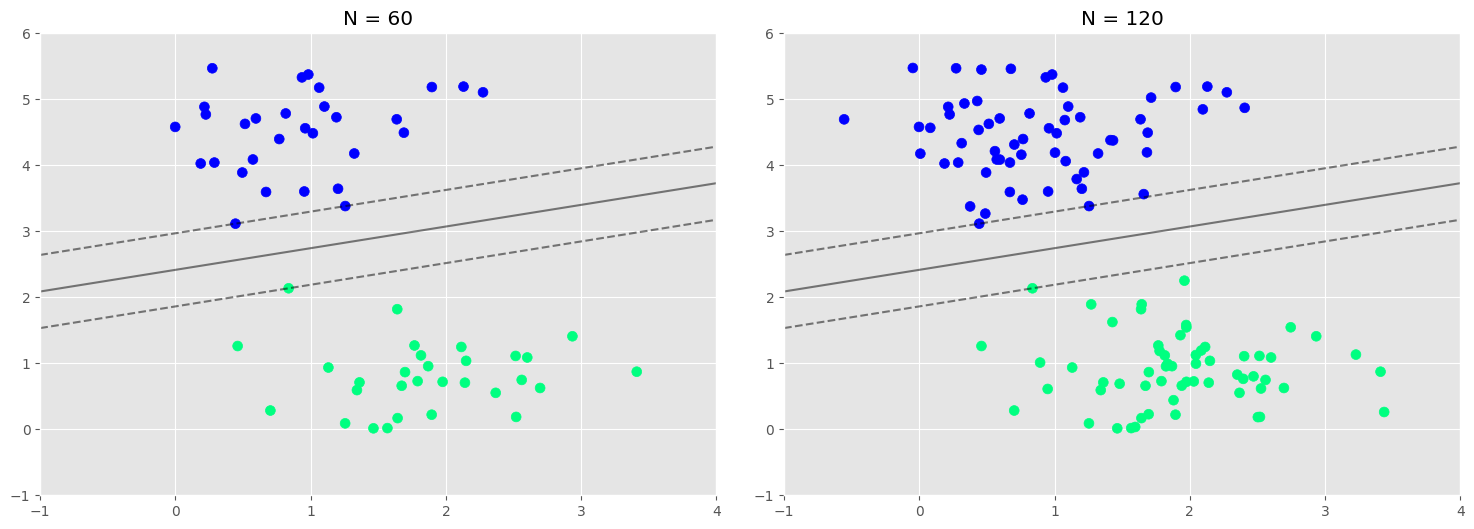

In [11]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    
    X = X[:N]
    y = y[:N]
    model = SVC(kernel="linear", C=1e10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="winter")
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(axs, [60, 120]):
    plot_svm(N, axi)
    axi.set_title(f'N = {N}')

## Working with almost linearly separable dataset

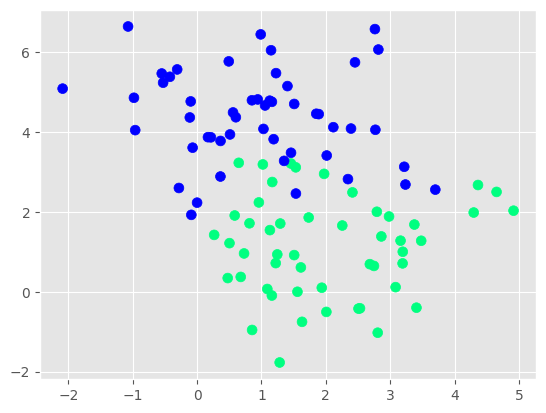

In [13]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="winter")
plt.show()

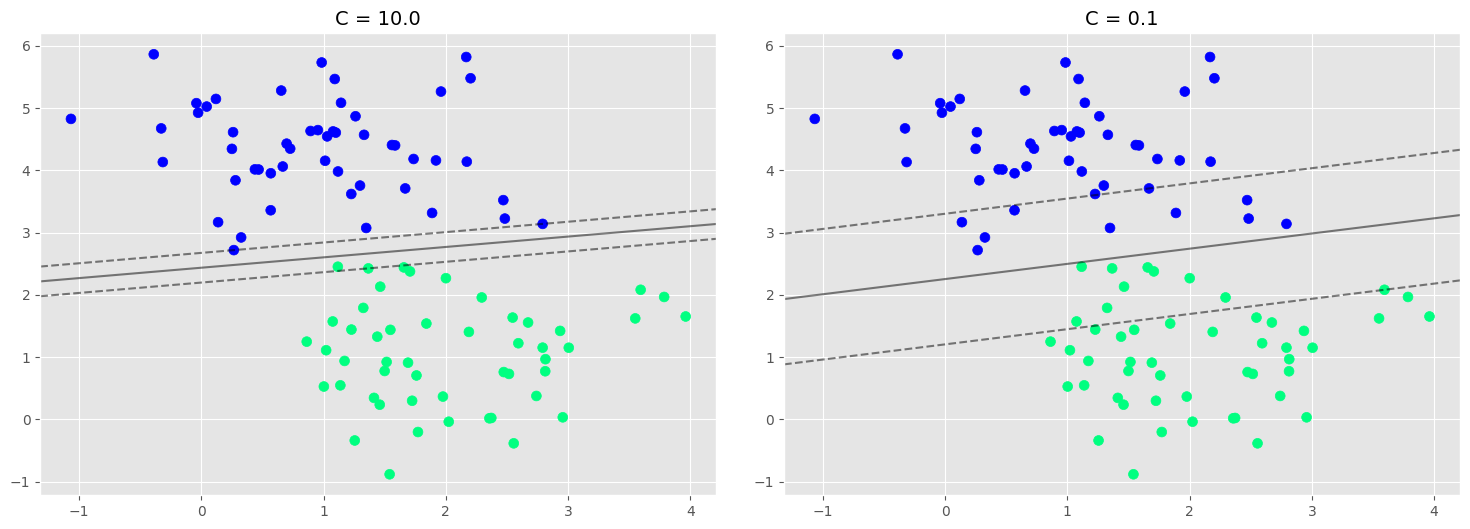

In [14]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(axs, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="winter")
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                s=300, lw=1, facecolor="none")
    axi.set_title(f"C = {round(C, 1)}", size=14)

## Kernel Trick

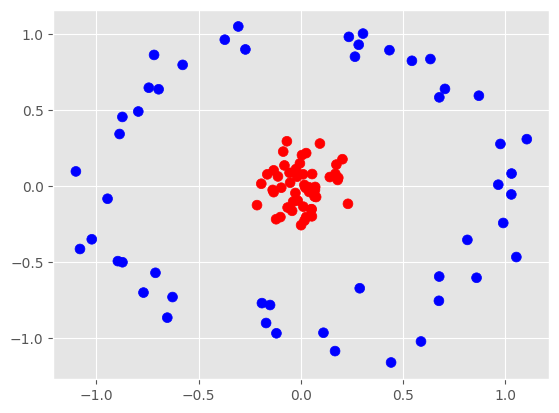

In [3]:
X, y = make_circles(n_samples=100, factor=0.1, noise=0.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="bwr")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### `linear` kernel

In [6]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.6

In [11]:
zero_one_colormap = ListedColormap(('blue', 'red'))

def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(
        np.arange(
            start=X_set[:, 0].min()-1,
            stop=X_set[:, 0].max()+1,
            step=0.01
        ),
        np.arange(
            start=X_set[:, 1].min()-1,
            stop=X_set[:, 1].max()+1,
            step=0.01
        )                   
    )
    
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75,
                cmap = zero_one_colormap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                   color = (zero_one_colormap)(i), label = j)
    plt.title("SVM Decision Boundary")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    return plt.show()

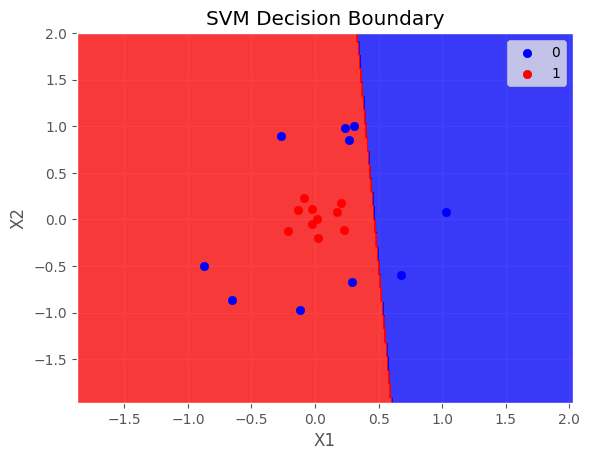

In [12]:
plot_decision_boundary(X_test, y_test, classifier)

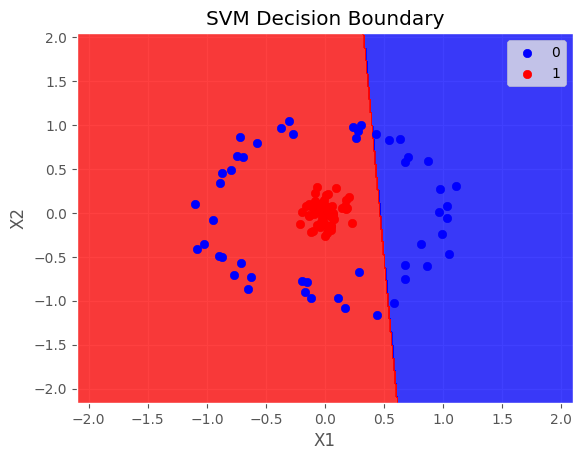

In [13]:
plot_decision_boundary(X, y, classifier)

### `rbf` kernel

$$\large y = e^{-x^2}  $$

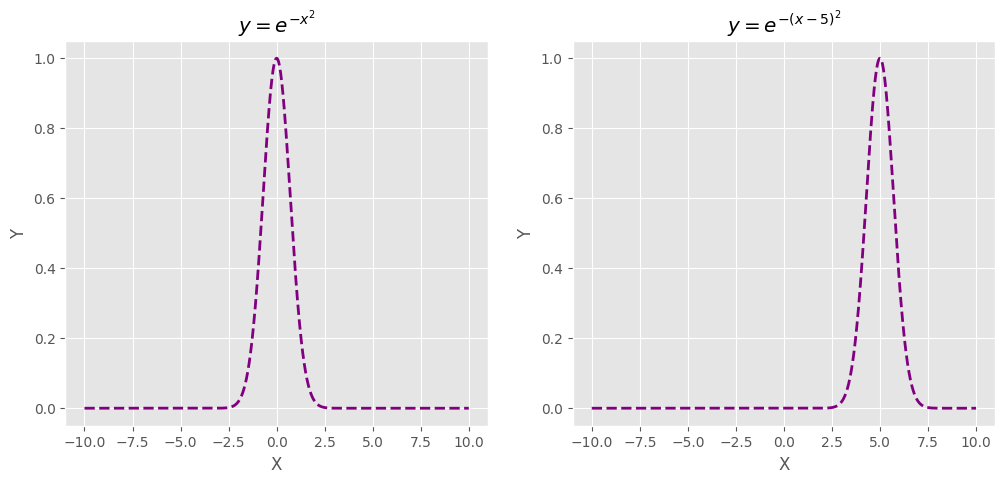

In [29]:
x1 = np.linspace(-10, 10, 10000)

def rbf(X):
    """
    If the center of your dataset is in the point 0.
    """
    return np.exp(-(X**2))

def rbf_shifted(X):
    """
    If your data in not centered at the point 0; then you will 
    also shift the function.
    """
    return np.exp(-(X-5)**2)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x1, rbf(x1), linestyle="--", color="purple", lw=2)
axs[0].set_title(r"$y = e^{-x^2}$")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")

axs[1].plot(x1, rbf_shifted(x1), linestyle="--", color="purple", lw=2)
axs[1].set_title(r"$y = e^{-(x-5)^2}$")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")

plt.show()

In [19]:
def plot_3d_plot(X, y):
    r = np.exp(-(X**2).sum(1))
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap="bwr")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("y")
    return ax

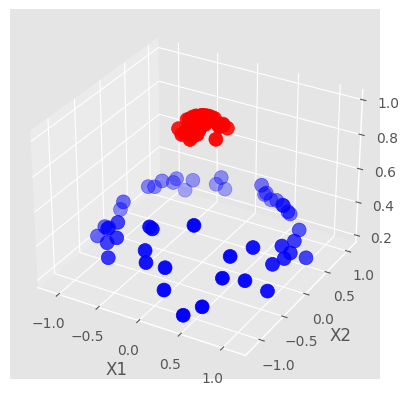

In [20]:
plot_3d_plot(X, y);

In [30]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

1.0

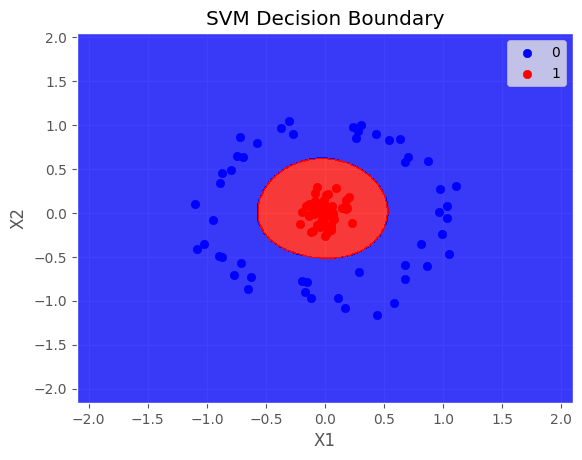

In [32]:
plot_decision_boundary(X, y, rbf_classifier);

### `poly` kernel

In [33]:
poly_classifier = SVC(kernel="poly")
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.55

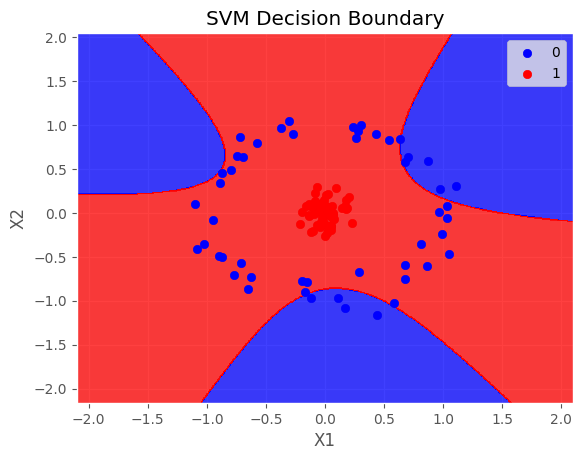

In [34]:
plot_decision_boundary(X, y, poly_classifier);

1.0


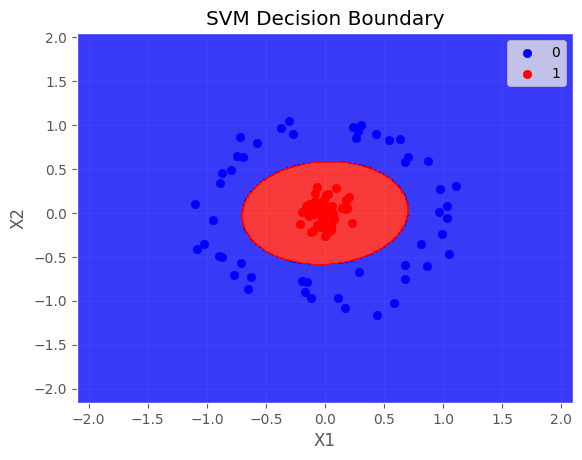

In [35]:
poly_classifier = SVC(kernel="poly", degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))

plot_decision_boundary(X, y, poly_classifier);